Goal: load data about locations and show on a map

In [14]:
# import our toolkit
import pandas as pd
import geopandas as gpd
from shapely import wkt
import duckdb
from lonboard import viz

In [2]:
# load (or reload) jupysql to create SQL cells
# no need to import duckdb_engine, JupySQL will auto-detect driver 
# load (or reload) jupysql Jupyter extension to create SQL cells
%reload_ext sql

Tip: You may define configurations in /Users/mxm/Code/mine/geo_worktrees/mgmSep2025/spikes/mgmSep2025/workspace1/pyproject.toml or /Users/mxm/.jupysql/config.

Did not find user configurations in /Users/mxm/Code/mine/geo_worktrees/mgmSep2025/spikes/mgmSep2025/workspace1/pyproject.toml.

In [3]:
# DuckDB in-memory database
conn = duckdb.connect()  # in-memory by default
%sql conn --alias duckdb

In [4]:
# install and load DuckDB extensions to work with spatial data and AWS
%sql INSTALL spatial;

Running query in 'duckdb'

Success


In [5]:
%sql INSTALL httpfs;

Running query in 'duckdb'

Success


In [6]:
%sql LOAD spatial;

Running query in 'duckdb'

Success


In [7]:
%sql LOAD httpfs;


Running query in 'duckdb'

Success


In [8]:
%sql SET s3_region='us-west-2'

Running query in 'duckdb'

Success


In [9]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

In [10]:
%%sql gulf_water <<
SELECT
    id,
    names.primary AS primary_name,
    ST_AsText(geometry) as geometry
FROM
    read_parquet('/Volumes/PRO-G40/OvertureMaps/data/release/2025-08-20.0/theme=base/type=water/*', filename=true, hive_partitioning=1)
WHERE
    bbox.xmin >= -91.3994
        and bbox.xmax <= -89.3864
        and bbox.ymin >= 29.152
        and bbox.ymax <= 30.5161

In [11]:
# dataframe to geodataframe, set crs
gulf_water_gdf = gpd.GeoDataFrame(
    gulf_water,
    geometry=gulf_water['geometry'].apply(wkt.loads),
    crs="EPSG:4326"
)

In [12]:
# Apply a lambda to remove point geometries
gulf_water_gdf = gulf_water_gdf[gulf_water_gdf['geometry'].apply(lambda x : x.geom_type!='Point' )]

<Axes: >

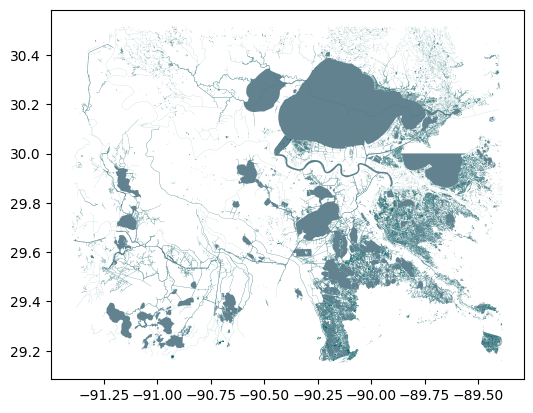

In [13]:
gulf_water_gdf.plot(facecolor="#628290", edgecolor="#006064", lw=0.05)t

In [16]:
viz(gulf_water_gdf)

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…